# Documentation for the pySPM library

Note that this is only a brief overview...

Loading the library

In [1]:
import pySPM
print(pySPM.__version__)

0.2.1


Let's set some variable and libraries to retrieve the data and plot them

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

## Nanoscan AFM loading
Let's load the data (forward topography by default) and plot it

Feedback: A_1st : P:1.6m/m : I:3.0ms
Size: 256×256 pixels = 20.0 um×20.0 um
Scan Speed: 6.0s/line


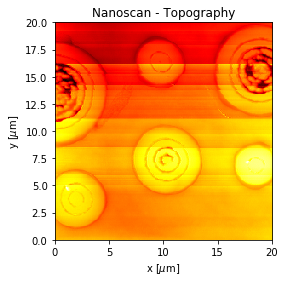

In [3]:
filename = os.path.join(os.path.abspath(os.path.join(pySPM.__file__,"..")),"data", "CristA_0002.xml")
Scan = pySPM.Nanoscan(filename)
topo = Scan.get_channel() # is equivalent to Scan.get_channel('Topography',backward=False)
topo.show()
print(Scan.getSummary())

## Bruker AFM loading
Load a file and display a list of the recorded channels

In [4]:
filename = os.path.join(os.path.abspath(os.path.join(pySPM.__file__,"..")),"data", "CristC_pos1.002")
ScanB = pySPM.Bruker(filename)
ScanB.list_channels()

Channels
	S [ZSensor] "Height Sensor"
	S [ZSensor] "Height Sensor"
	S [] "Peak Force Error"
	S [SneddonModulus] "Sneddon Modulus"
	S [] "Log Sneddon Modulus"
	S [Adhesion] "Adhesion"
	S [Dissipation] "Dissipation"
	S [Deformation] "Deformation"


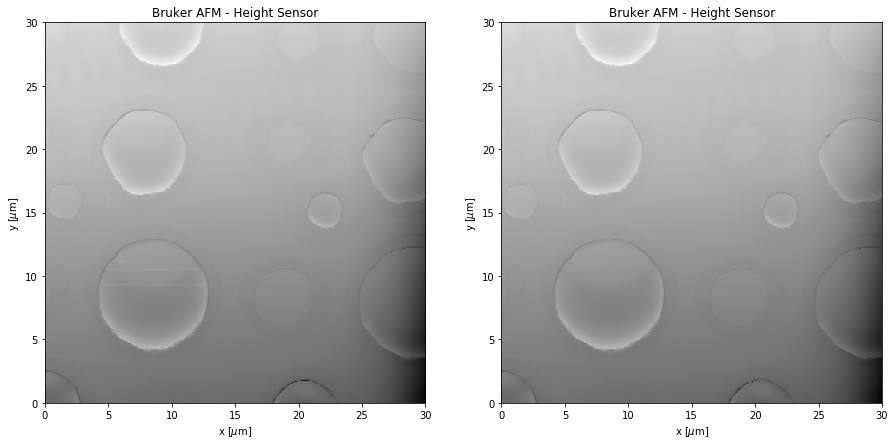

In [5]:
topoB = ScanB.get_channel()

fig, ax = plt.subplots(1,2,figsize=(15,7))
topoB.show(ax=ax[0])
topoB.filter_scars_removal()
topoB.show(ax=ax[1]);

## nanonis XSM loading

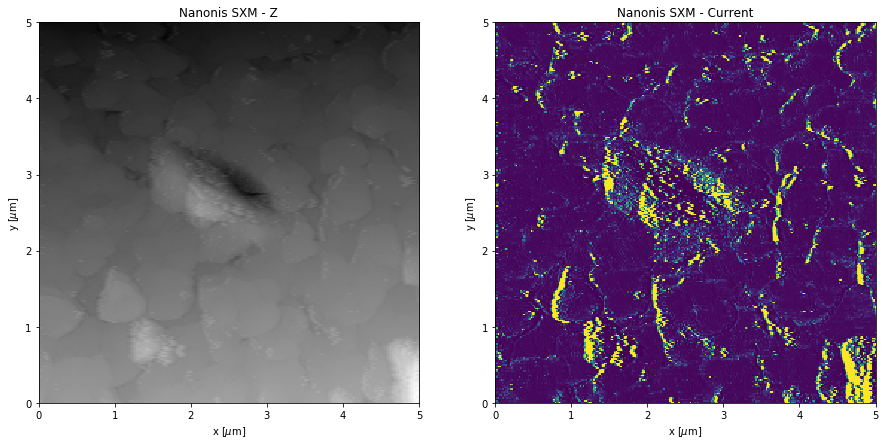

In [6]:
filename = os.path.join(os.path.split(pySPM.__file__)[0], "data", "test.sxm")
S = pySPM.SXM(filename)

fig, ax = plt.subplots(1,2,figsize=(15,7))
S.get_channel('Z').show(ax=ax[0]);
p = S.get_channel('Current').show(ax=ax[1], cmap='viridis');

## ToF-SIMS Data loading (ITA images)
Load an image and show the list of the recorded peaks (channels).
Displayed is the assignment name (if any) then three numbers representing the lower, center and upper mass of the peak

In [7]:
filename = os.path.join(os.path.abspath(os.path.join(pySPM.__file__,"..")),"data", "AuTi_Img_Bi1_p_A2_7_0.ita")

TOF = pySPM.ITA(filename)
TOF.show_masses()

0: (total) [] 0.00u - 878.78u (center: 439.39u)
1: (sum of rest) [] 0.00u - 878.78u (center: 439.39u)
2: () [C+] 11.89u - 12.10u (center: 12.00u)
3: () [CH+] 12.89u - 13.11u (center: 13.00u)
4: () [CH_2+] 13.89u - 14.12u (center: 14.01u)
5: () [CH_3+] 14.90u - 15.14u (center: 15.02u)
6: () [Na+] 22.84u - 23.14u (center: 22.99u)
7: () [CHN+] 26.85u - 27.18u (center: 27.02u)
8: () [C_4H_12N+] 73.81u - 74.36u (center: 74.09u)
9: () [Ag+] 106.56u - 107.23u (center: 106.91u)
10: () [^109Ag+] 108.56u - 109.24u (center: 108.91u)
11: () [Ag_2+] 213.37u - 214.28u (center: 213.82u)
12: () [Ag_2H+] 214.38u - 215.33u (center: 214.85u)
13: () [^109AgAg+] 215.37u - 216.31u (center: 215.82u)
14: () [Ag^109AgH+] 216.38u - 216.89u (center: 216.72u)
15: () [^109Ag_109Ag+] 217.37u - 218.36u (center: 217.83u)
16: () [^109Ag_109AgH+] 218.39u - 219.46u (center: 218.85u)
17: () [Ag_3+] 320.18u - 321.29u (center: 320.74u)
18: () [Ag_2^109Ag+] 322.15u - 323.30u (center: 322.74u)
19: () [Ag^109Ag_2+] 324.15u - 

### Retriving ToF-SIMS channel by Mass

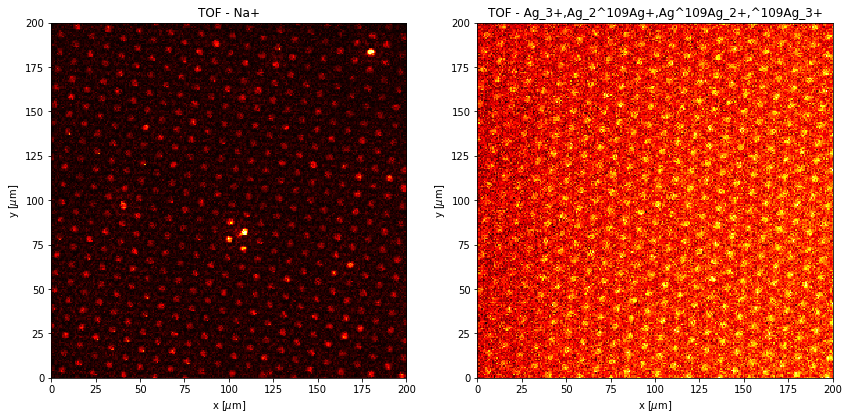

In [8]:
fig, ax = plt.subplots(1,2,figsize=(14,7))

TOF.getAddedImageByMass(23).show(cmap='hot',ax=ax[0])
TOF.getAddedImageByMass([321,323,325,327]).show(cmap='hot',ax=ax[1]);

### Retriving ToF-SIMS channels by Name

9: () [Ag+] 106.56u - 107.23u (center: 106.91u)
11: () [Ag_2+] 213.37u - 214.28u (center: 213.82u)
12: () [Ag_2H+] 214.38u - 215.33u (center: 214.85u)
14: () [Ag^109AgH+] 216.38u - 216.89u (center: 216.72u)
17: () [Ag_3+] 320.18u - 321.29u (center: 320.74u)
18: () [Ag_2^109Ag+] 322.15u - 323.30u (center: 322.74u)
19: () [Ag^109Ag_2+] 324.15u - 325.30u (center: 324.74u)


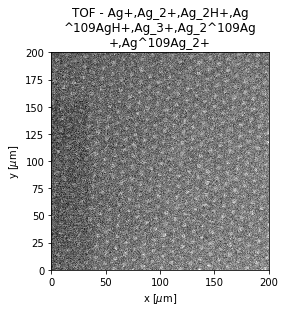

In [9]:
Z, ch = TOF.getAddedImageByName("Ag")
TOF.show_masses(ch)
Z.show(wrap=25); # wrap allows the title to be on multiple lines (its value is the number of chars per line)

## Data correction
All the above technique can generate an SPM_image out of raw data.
The SPM_image propose several functions to correct/plot the data

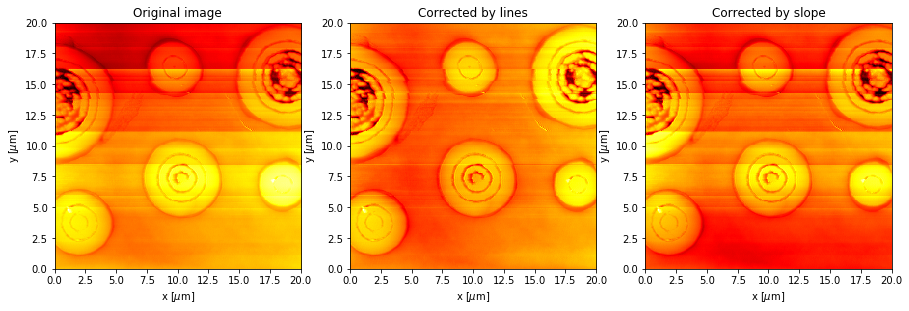

In [10]:
topo2 = topo.correct_lines(inline=False)
topo3 = topo.correct_plane(inline=False)

fig, ax = plt.subplots(1,3,figsize=(15,5))
topo.show(ax=ax[0])
ax[0].set_title("Original image")
topo2.show(ax=ax[1])
ax[1].set_title("Corrected by lines")
topo3.show(ax=ax[2])
ax[2].set_title("Corrected by slope");

### Data correction: Median of differences

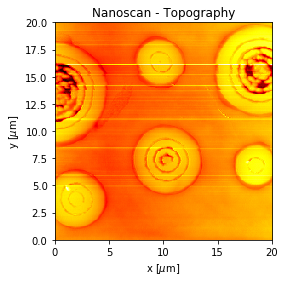

In [11]:
import copy
topo4 = copy.deepcopy(topo) # make deepcopy of object otherwise you will just change the original
topo4.correct_median_diff()
topo4.show();

### Data correction: Adjust lines in order to have a given path flat
A better way to correct the data is by defining pathes that should be flat and each line will be offseted automatically in order to get the defines lines as flat as possible. First let's display the data with the pixel values in the axis instead of the real size. The pixels coordinated will be used to define the path.

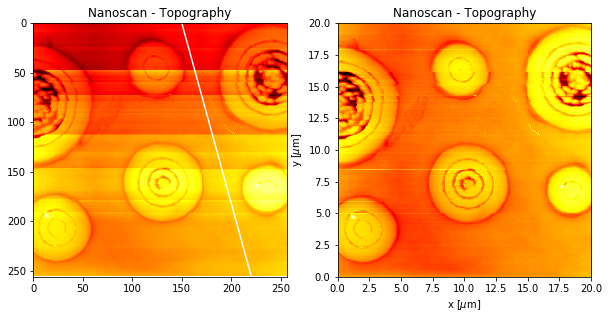

In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot([150,220],[0,255],'w-');
topo.show(pixels=True,ax=ax[0])
topoC = topo.offset([[150,0,220,255]],inline=False)
topoC.show(ax=ax[1]);

in this particular case, the line (150,0) → (220,255) should be flat.
Here we used unline=False in order to create a new object with the corrected data and keep the data of topo untouched.

### Scars removal
We should now remove the scars from the image

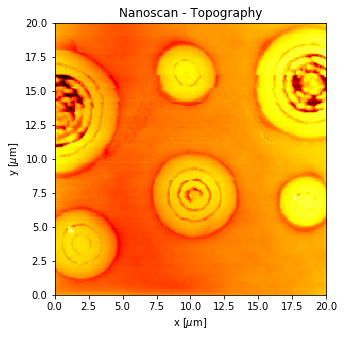

In [13]:
topoD = topoC.filter_scars_removal(inline=False)

fig, ax = plt.subplots(1,1,figsize=(5,5))
topoD.show(ax=ax);

OK. This was the basic to read the data.

## Read specific channel
What about getting other information than just the topography?

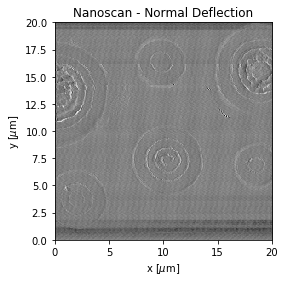

In [14]:
ND = Scan.get_channel(channel="Normal Deflection")
ND.show();

Let's analyse the spectral response

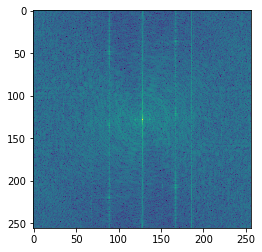

In [15]:
plt.imshow(np.log(np.abs(ND.get_fft())));

## Plotting the data

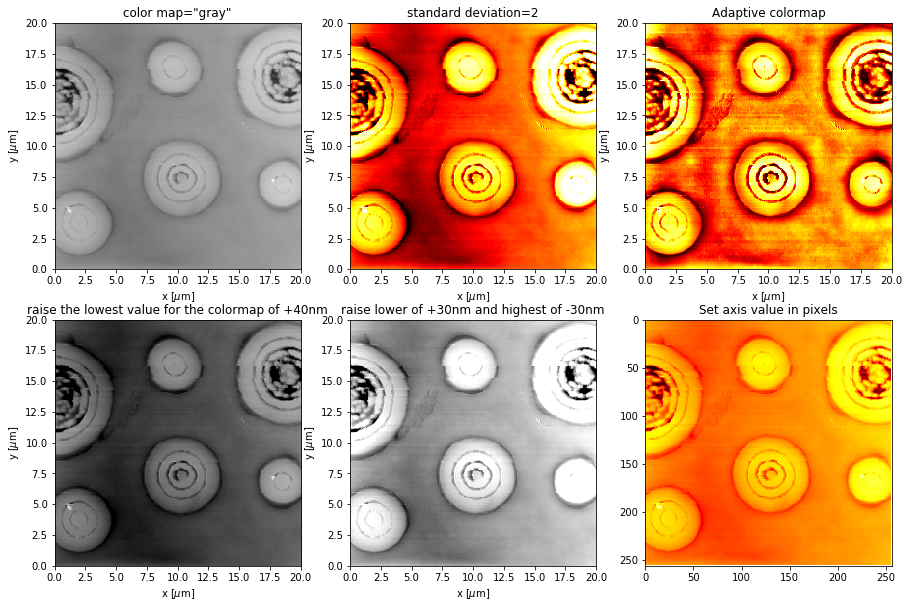

In [16]:
fig, (ax,ax2) = plt.subplots(2,3,figsize=(15,10))
topoD.show(ax=ax[0],cmap='gray',title="color map=\"gray\"")
topoD.show(ax=ax[1],sig=2,title="standard deviation=2")
topoD.show(ax=ax[2],adaptive=True,title="Adaptive colormap")
topoD.show(ax=ax2[0],dmin=4e-8,cmap='gray',title="raise the lowest value for the colormap of +40nm")
topoD.show(ax=ax2[1],dmin=3e-8,dmax=-3e-8,cmap='gray',title="raise lower of +30nm and highest of -30nm")
topoD.show(ax=ax2[2],pixels=True,title="Set axis value in pixels");

## Getting a profile

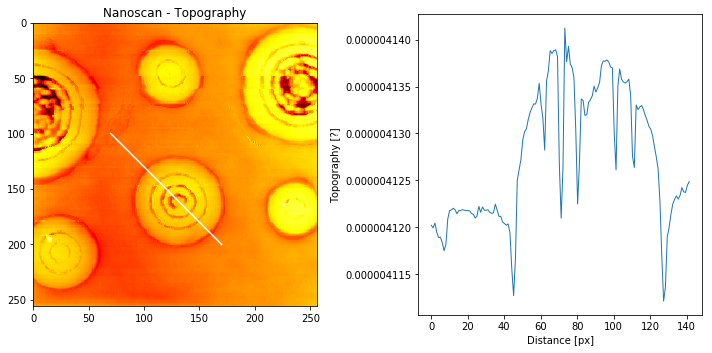

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

topoD.plot_profile(70,100,170,200,ax=ax[1],img=ax[0]);
topoD.show(ax=ax[0],pixels=True)

plt.tight_layout()

## Extra functions
### dist_v2
This function return you the distance to the closest corner. This might be usefull to be applied for FFT filters for example.

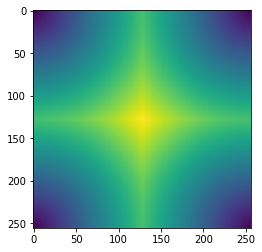

In [18]:
plt.imshow(topo.dist_v2());

### getBinThreshold
return a binary threshold of the data

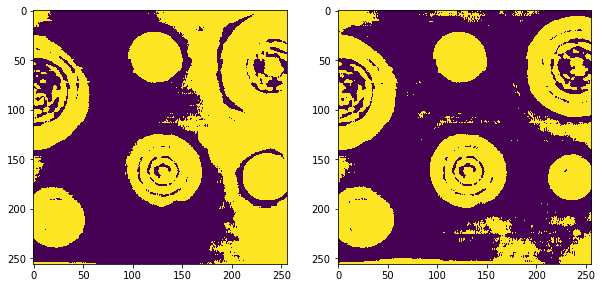

In [19]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(np.flipud(topoD.get_bin_threshold(.58))); # The matrix is flipped UP side DOWN to be displayed in the right orientation
ax[1].imshow(np.flipud(topoD.get_bin_threshold(171,adaptive=True)));

### fit2d
Fit a matrix by a 2d-polynomial (default 2nd order in x, 1st in y as it's the usual creep I observe with the piezo)

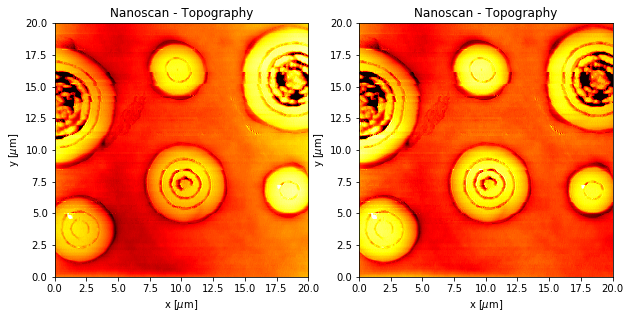

In [20]:
Flat = copy.deepcopy(topoD)
r,Z=pySPM.fit2d(Flat.pixels)
Flat.pixels -= Z

fig, ax = plt.subplots(1,2,figsize=(10,5))
topoD.show(ax=ax[0],sig=3)
Flat.show(ax=ax[1],sig=3);

# Collections
SPM and ToF-SIMS data contains usually several images for different channels for the same measurement. This library provides a class Collection which can handles that easilly.


## Collections for ToF-SIMS images

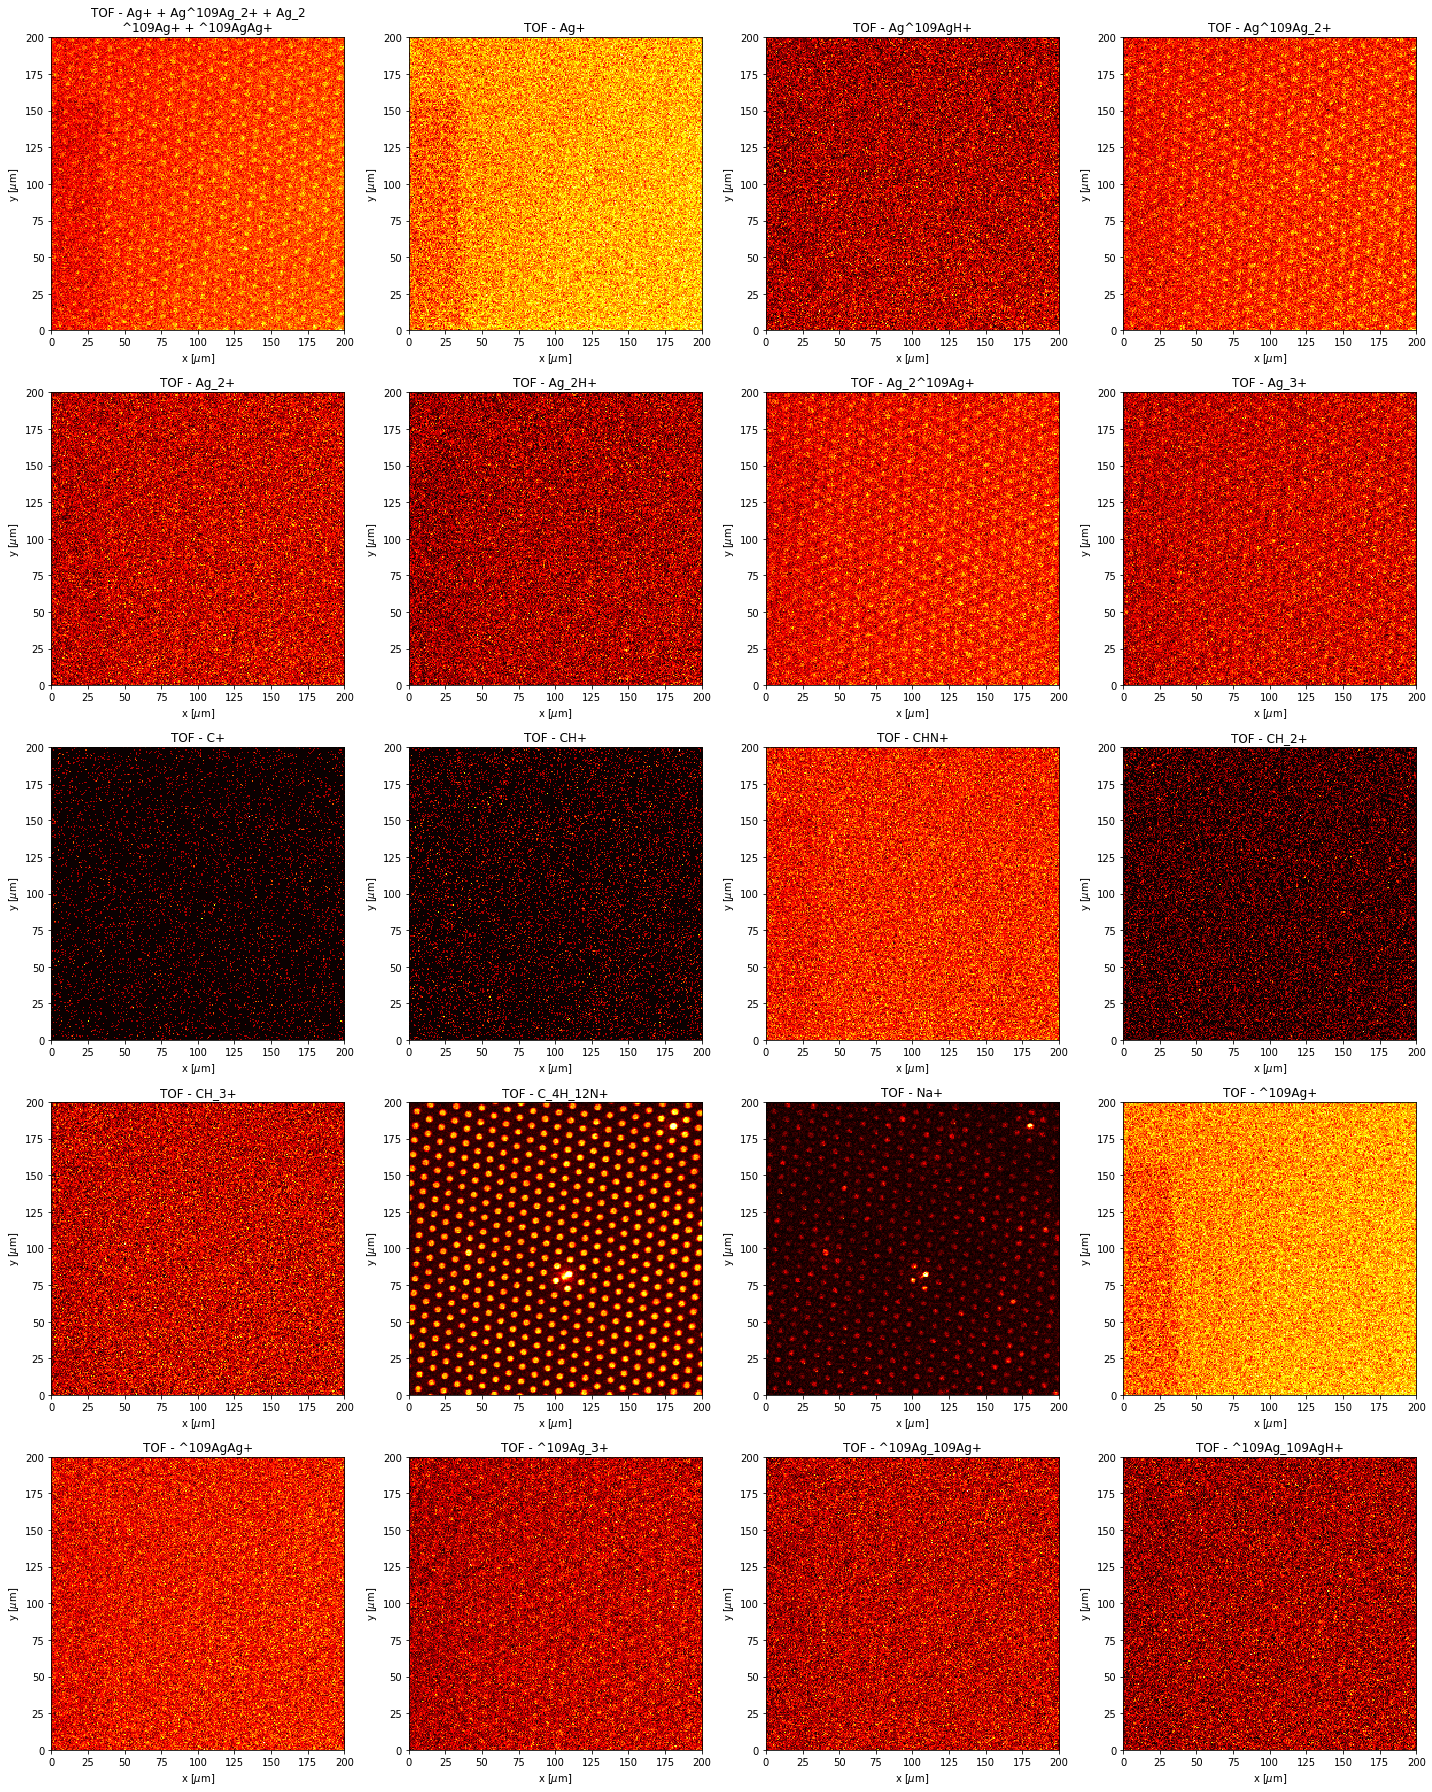

In [21]:
import pySPM
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

filename = os.path.join(os.path.abspath(os.path.join(pySPM.__file__,"..")),"data","AuTi_Img_Bi1_p_A2_7_0.ita")
TOFC = pySPM.ITA_collection(filename)
TOFC['Ag'] = TOFC['Ag+']+TOFC['Ag^109Ag_2+']+TOFC['Ag_2^109Ag+']+TOFC['^109AgAg+']
TOFC.show(ncols=4,wrap=30)
plt.tight_layout();

### Overlay

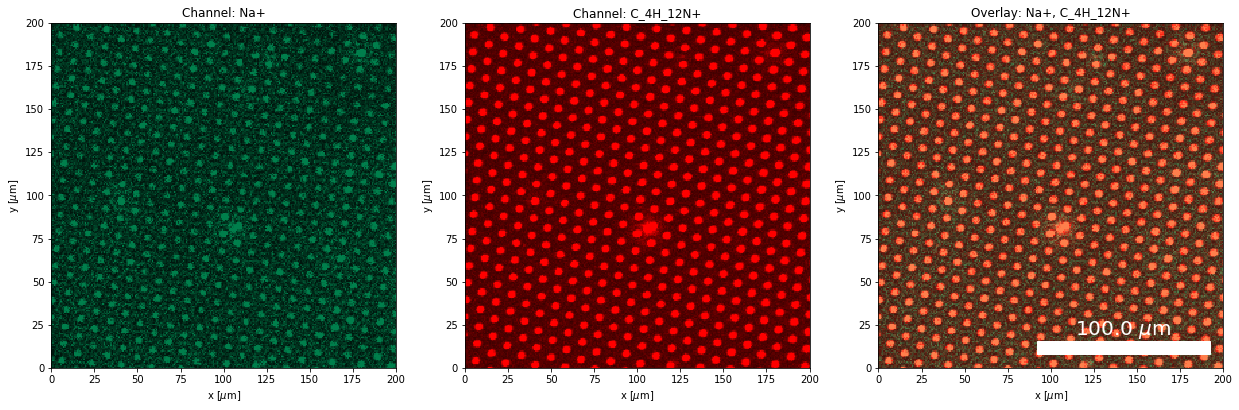

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(21,7))

channels = ['Na+','C_4H_12N+']
O,ch = TOFC.overlay(channels,sig=1.5,ax=ax[2])
ax[2].set_title("Overlay: "+", ".join(channels))
TOFC['Na+'].add_scale(100e-6, height=10, ax=ax[2], pixels=False);
for i,x in enumerate(ch):
    x.show(ax=ax[i]);
    ax[i].set_title("Channel: "+channels[i])

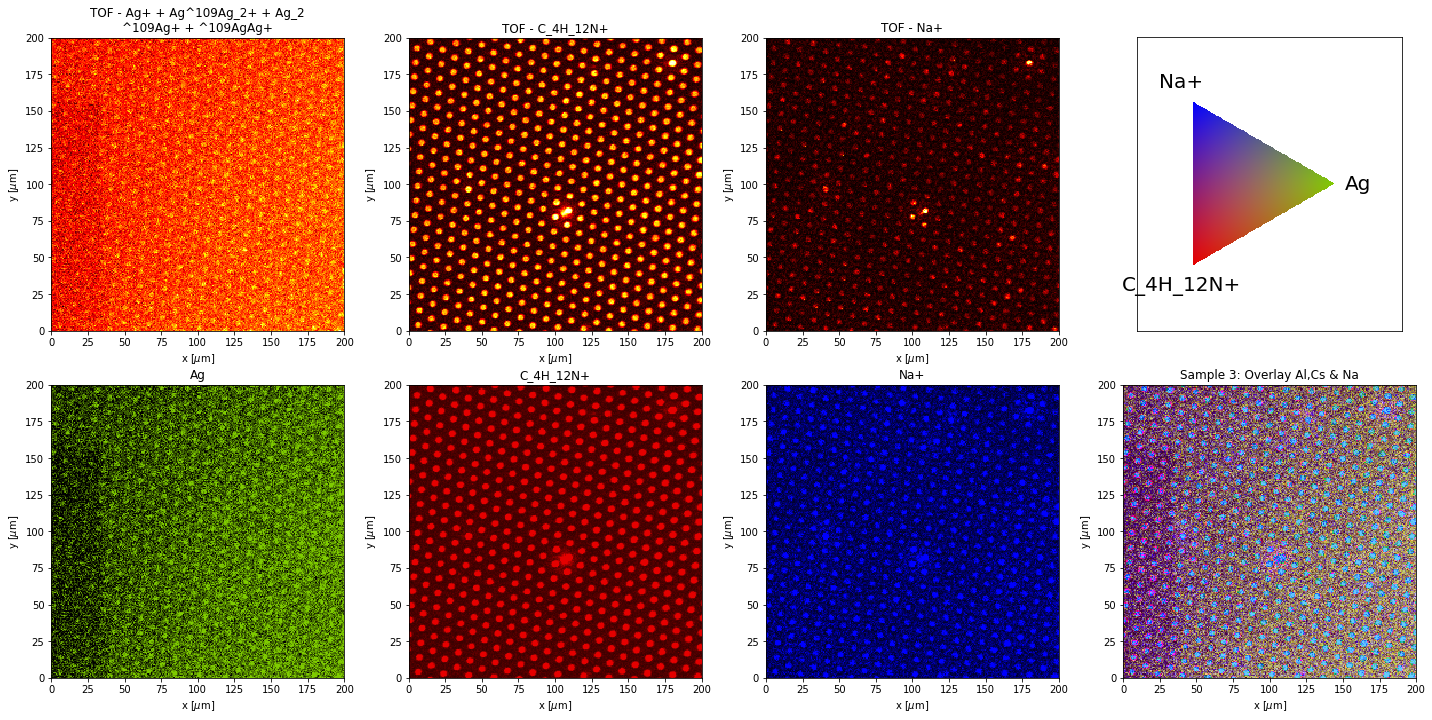

In [23]:
fig, ax= plt.subplots(2,4,figsize=(20,10))
cols=[[.5,.8,0],[.9,0,0],[0,0,1]]
chs=['Ag','Na+','C_4H_12N+']
TOFC.show(ax=ax[0],channels=chs,wrap=30)
O, ch = TOFC.overlay(chs,cols,ax=ax[1][3],sig=1.5)

pySPM.collection.overlay_triangle(chs,cols,ax=ax[0][3],bgcolor=[1,1,1],textcolor='black')
ax[1][3].set_title("Sample 3: Overlay Al,Cs & Na")
for i,c in enumerate(ch):
    c.show(ax=ax[1][i])
    ax[1][i].set_title(chs[i])
plt.tight_layout()

###  PCA
The screeplot will help you to remember how many PC are important.
But first you have to runPCA()

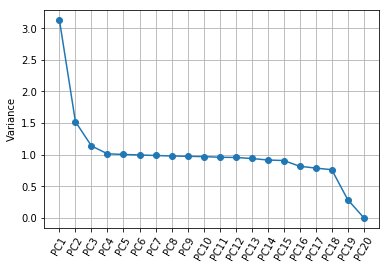

In [24]:
TOFC.runPCA()
TOFC.PCA.screeplot()

Ag       Ag+  Ag^109AgH+  Ag^109Ag_2+     Ag_2+    Ag_2H+  \
PC1  0.493820  0.224455    0.107944     0.344878  0.116203  0.108397   
PC2 -0.307747 -0.523339    0.002890    -0.013120  0.016399  0.005828   
PC3  0.247177 -0.115966   -0.261983     0.231185 -0.110253 -0.275818   

     Ag_2^109Ag+     Ag_3+        C+       CH+      CHN+     CH_2+     CH_3+  \
PC1     0.350260  0.193412  0.017319  0.011151  0.107634  0.017510  0.056095   
PC2    -0.016985  0.126717 -0.013102 -0.013735 -0.034591 -0.023958 -0.059899   
PC3     0.223988 -0.072927 -0.150175 -0.139446 -0.379194 -0.215878 -0.368448   

     C_4H_12N+       Na+   ^109Ag+  ^109AgAg+  ^109Ag_109Ag+  ^109Ag_109AgH+  \
PC1   0.373333  0.328990  0.157386   0.215729       0.103969        0.110391   
PC2   0.475837  0.452814 -0.377819  -0.145405       0.014513        0.026523   
PC3  -0.038571 -0.124592 -0.332894   0.288827      -0.116479       -0.244130   

     ^109Ag_3+  
PC1   0.180126  
PC2   0.112226  
PC3  -0.084222

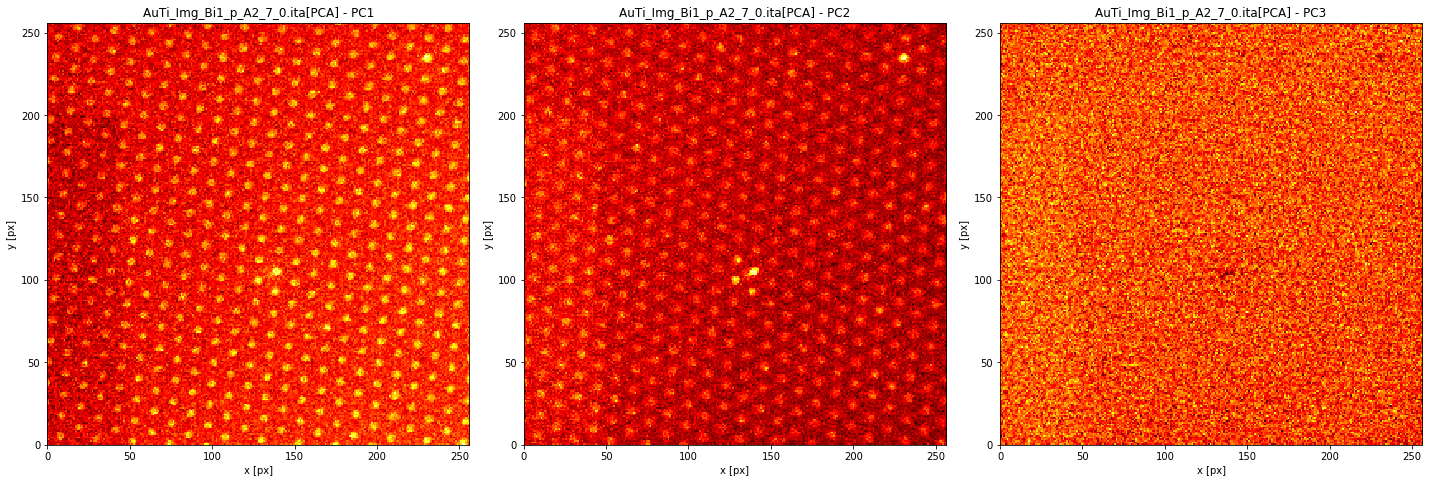

In [25]:
TOFC.showPCA(num=3,ncols=4)
TOFC.loadings(num=3)

# ToF-SIMS, ITM files and data reconstruction
ITM saved raw data which can be used for reconstruction and other low level data recovery

## Retrieving Measurement Data
Some data are saved at the beginning of the measurement and at the end. They can be displayed as a table as follow:

In [26]:
Path = os.path.join(os.path.abspath(os.path.join(pySPM.__file__,"..")),"data","Sample_Crisitina_I_Bi1.itm")
I = pySPM.ITM(Path)
I.showValues(names=['Instrument.LMIG.Aperture_1','Instrument.LMIG.Extractor','Instrument.LMIG.Suppressor','Instrument.LMIG.EmissionCurrent','Experiment.AcquisitionTime'])

You can also display them in a GUI in order to explore the data more conveniently:

In [27]:
#I.showValues(gui=True)

### Retrieve Data variations during the measurement

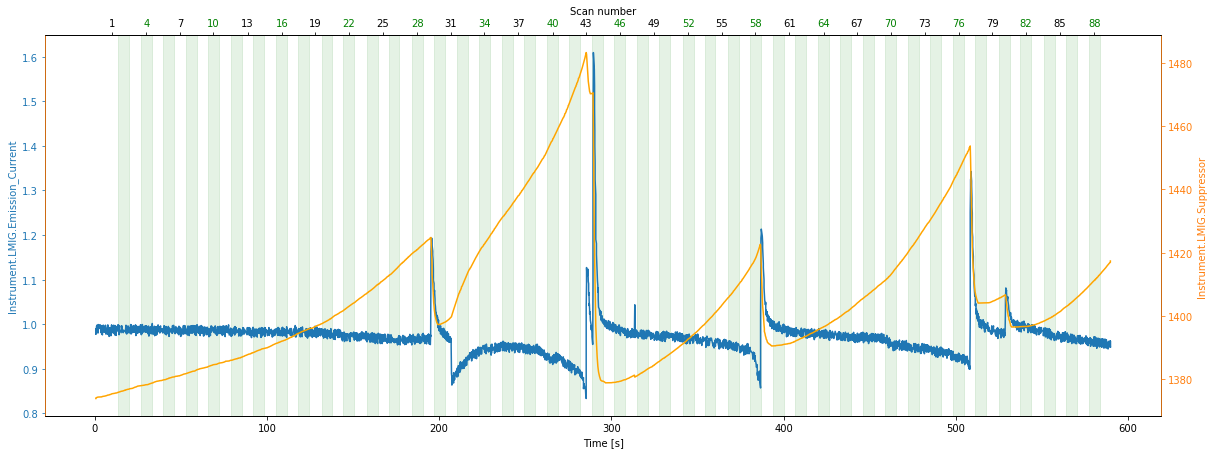

In [28]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
I.showMeasData(ax=ax, mul=1e6, scans=3) # Display a tick every 3 scans (top axis)
axb = ax.twinx()
I.showMeasData("Instrument.LMIG.Suppressor",ax=axb,color='orange', scans=False);

for a, col in [(ax,'C0'),(axb,'C1')]:
    a.spines['left'].set_color(col)
    a.spines['right'].set_color(col)
    a.yaxis.label.set_color(col)
    a.tick_params(axis='y', colors=col)

## Retrieve the pixel order in a random exposure

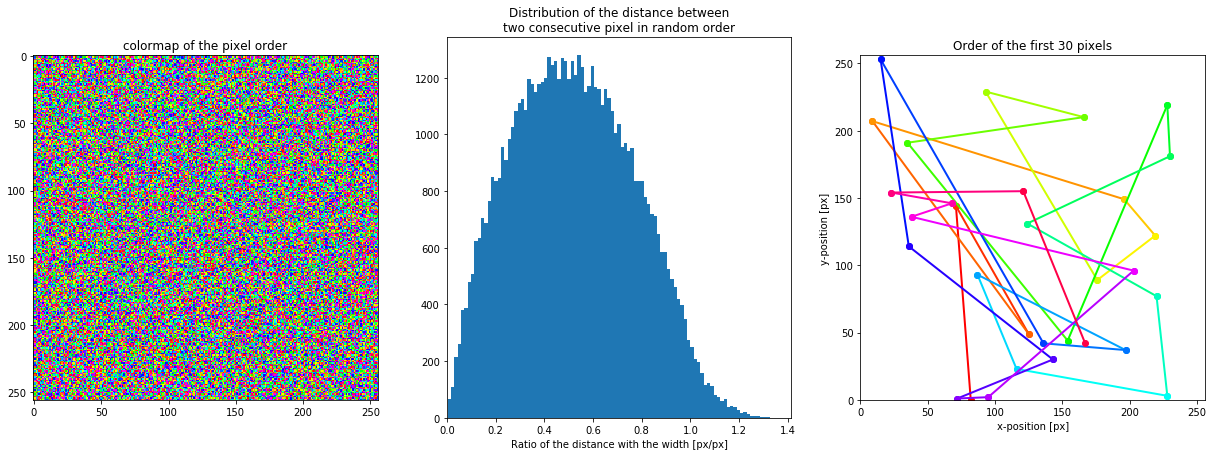

In [29]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
PixelList, PixelOrder,  Blocks = I.getRawData(scan=0)

A = np.array(PixelList)
distances = np.sqrt(np.sum((A[1:,:]-A[:-1,:])**2, axis=1))

ax[0].imshow(PixelOrder,cmap='hsv');
ax[0].set_title("colormap of the pixel order")

ax[1].hist(distances/PixelOrder.shape[0], bins=100);
ax[1].set_title("Distribution of the distance between\ntwo consecutive pixel in random order")
ax[1].set_xlabel("Ratio of the distance with the width [px/px]");
ax[1].set_xlim((0,np.sqrt(2)));

cm = plt.get_cmap('hsv')

N = 30
for i in range(N):
    ax[2].plot(A[i:i+2,0], A[i:i+2,1],'o-',color=cm(i/N), linewidth=2);
ax[2].set_xlim((0,PixelOrder.shape[1]))
ax[2].set_ylim((0,PixelOrder.shape[0]));
ax[2].set_title("Order of the first {} pixels".format(N))
ax[2].set_xlabel("x-position [px]")
ax[2].set_ylabel("y-position [px]");
ax[2].set_aspect('equal');

In the above example black is for the first pixel and white for the last.
As we can see the pixel order seems to be the same during the whole measurement

## Spectrum retrival per scan

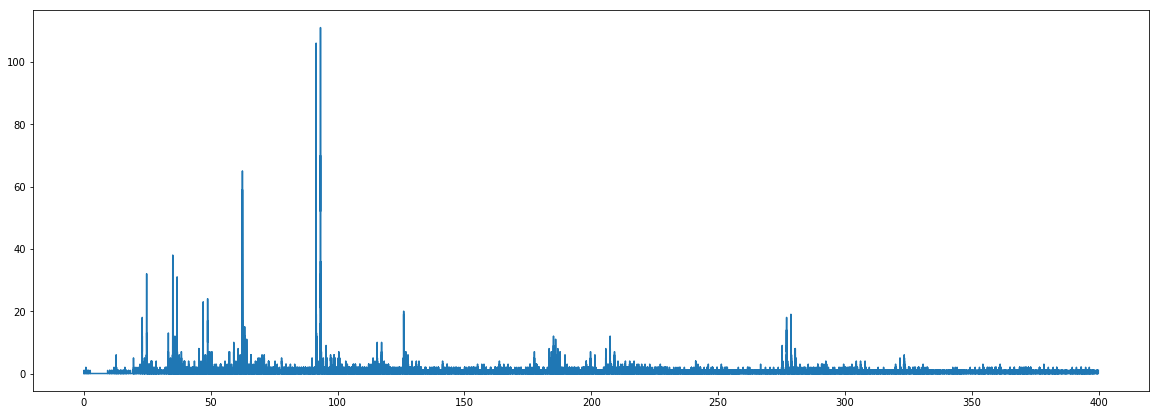

In [30]:
PixelList, PixelOrder, Data = I.getRawData()

Max_time = max([0 if not Data[x] else max(Data[x]) for x in Data])
Spectrum = np.zeros(Max_time+1)
for x in Data:
    for i in Data[x]:
        Spectrum[i] += 1

masses = I.channel2mass(np.arange(Max_time+1),sf=100000,k0=0) # sf and k0 are the callibration

fig = plt.figure(figsize=(20,7))
plt.plot(masses,Spectrum,label="Scan 1");

### SI image retrival per scan
The pixel order can be retrieved as follow

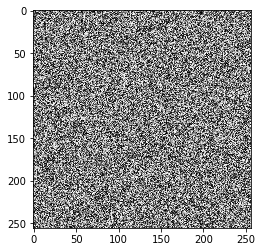

In [33]:
import pySPM
import numpy as np
import matplotlib.pyplot as plt
import zlib
%matplotlib inline

import os

Path = os.path.join(os.path.abspath(os.path.join(pySPM.__file__,"..")),"data","Sample_Crisitina_I_Bi1.itm")
I = pySPM.ITM(Path)
PixelList, PixelOrder, Data = I.getRawData(0)
plt.imshow(PixelOrder, cmap='gray');

In [34]:
try:
    from tqdm import tqdm_notebook as tqdm
except:
    try:
        from tqdm import tqdm
    except:
        tqdm = None

Counts = PixelOrder * 0
Scans = range(I.Nscan)
if tqdm is not None:
    Scans = tqdm(Scans)
for s in Scans:
    PixelList, PixelOrder, Data = I.getRawData(s)
    for xy in Data:
        Counts[xy[1],xy[0]] += len(Data[xy])

HBox(children=(IntProgress(value=0, max=90), HTML(value='')))

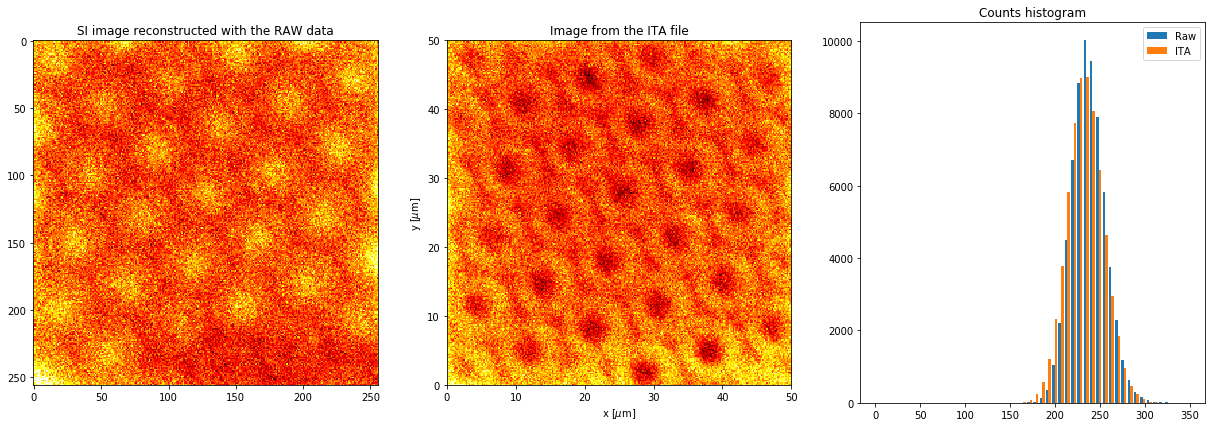

In [35]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
pySPM.imshow_sig(Counts,ax=ax[0],cmap='hot',sig=4);
ax[0].set_title("SI image reconstructed with the RAW data")
Path = os.path.join(os.path.abspath(os.path.join(pySPM.__file__,"..")),"data", "Sample_Crisitina_I_Bi1_2_0.ita")
IA = pySPM.ITA(Path)
IA.getAddedImageByMass(0).show(ax=ax[1],cmap='hot',sig=4);
ax[1].set_title("Image from the ITA file");
ax[2].hist([Counts.ravel(),IA.getAddedImageByMass(0).pixels.ravel()],bins=50,label=("Raw","ITA"));
ax[2].legend()
ax[2].set_title("Counts histogram");

## Spectrum Reconstruction

c:\users\ols\dropbox\python\pyspm\pySPM\utils\__init__.py:46: UserWarning: Function getMass is deprecated. Please use "get_mass" instead
  warn("Function getMass is deprecated. Please use \"get_mass\" instead")


HBox(children=(IntProgress(value=0, max=3), HTML(value='')))

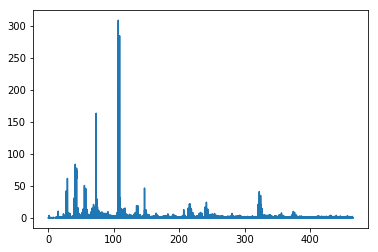

In [36]:
m,D = I.getRawSpectrum(range(3),prog=True) # takes only the 3 first scans (for time saving purpose)
plt.plot(m,D);

# Various utilities
## Math
### Gaussian / Lorentzian and CDF

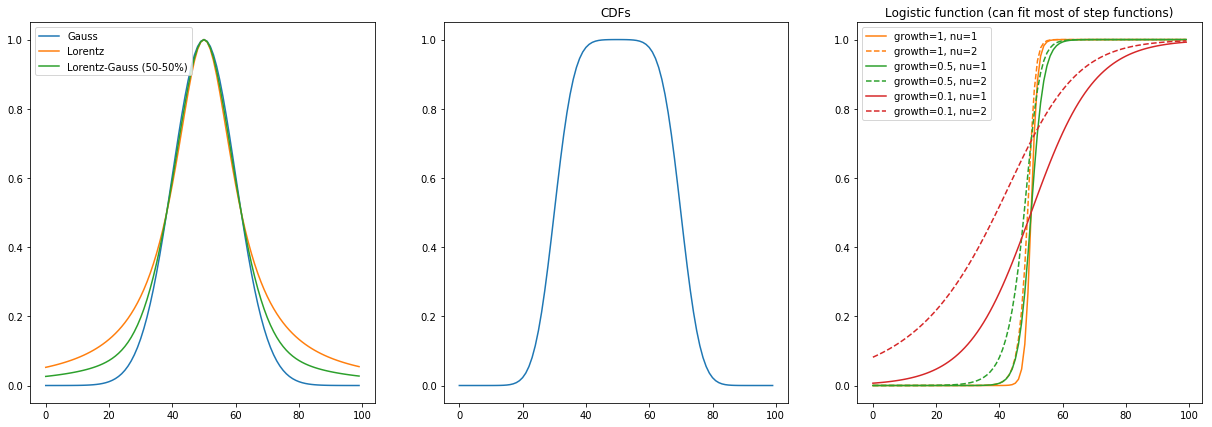

In [37]:
ax = pySPM.utils.sp(3) # create 3 sub-plots

x = np.arange(100)

ax[0].plot(x,pySPM.utils.Gauss(x,50,10,1), label='Gauss');
ax[0].plot(x,pySPM.utils.LG(x,50,10,1, lg=1), label='Lorentz')
ax[0].plot(x,pySPM.utils.LG(x,50,10,lg=.5), label='Lorentz-Gauss (50-50%)')
ax[0].legend();

ax[1].plot(x,pySPM.utils.CDF(x,30,5)-pySPM.utils.CDF(x,70,5), label="CDF")
ax[1].set_title("CDFs");

for i,g in enumerate([1,.5,.1]):
    for j,nu in enumerate([1,2]):
        ax[2].plot(x, pySPM.utils.logistic(x, x0=50, growth=g, nu=nu), label='growth={}, nu={}'.format(g, nu), color='C'+str(i+1), linestyle=['-','--',':'][j]);
ax[2].legend();
ax[2].set_title("Logistic function (can fit most of step functions)");

## Plotting

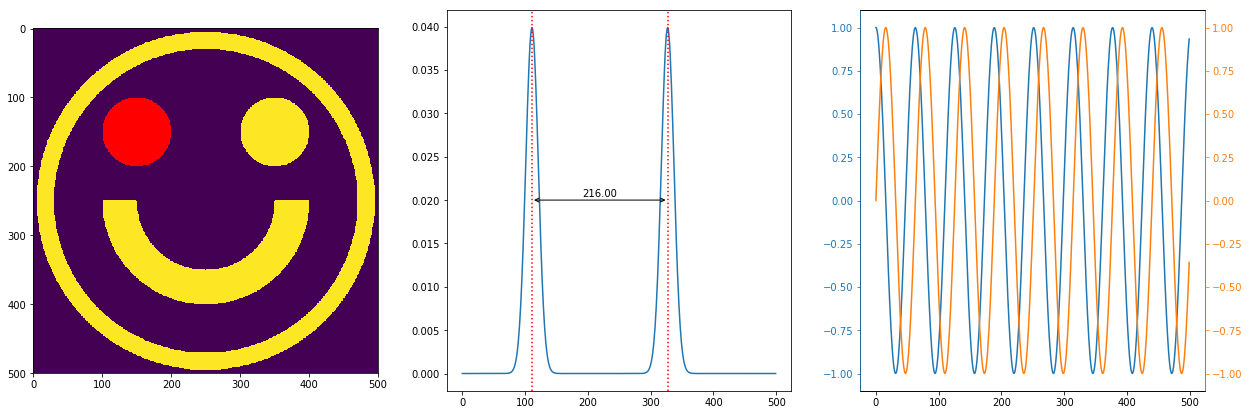

In [38]:
Y, X = np.mgrid[:500,:500]
R = np.sqrt((X-250)**2+(Y-250)**2)
LeftI= (np.sqrt((X-150)**2+(Y-150)**2)<50)
smiley = (R>=220)*(R<245)+LeftI+(np.sqrt((X-350)**2+(Y-150)**2)<50)+(R>100)*(R<150)*(Y>=250)

ax = pySPM.utils.sp(3)

ax[0].imshow(smiley);
pySPM.utils.plotMask(ax[0], LeftI, 'r'); # Let you paint a specific region by a specific color

x = np.arange(500)
ax[1].plot(x, pySPM.utils.Gauss(x,111,10)+pySPM.utils.Gauss(x,327,10));
pySPM.utils.Xdist(ax[1],111,327, 0.02); # plot and highlight distance

ax[2].plot(x, np.cos(x/10));
axb = pySPM.utils.DualPlot(ax[2]); # automatically create a dual plot and paint legend with correct colors
axb.plot(x, np.sin(x/10), 'C1');

## Spectra

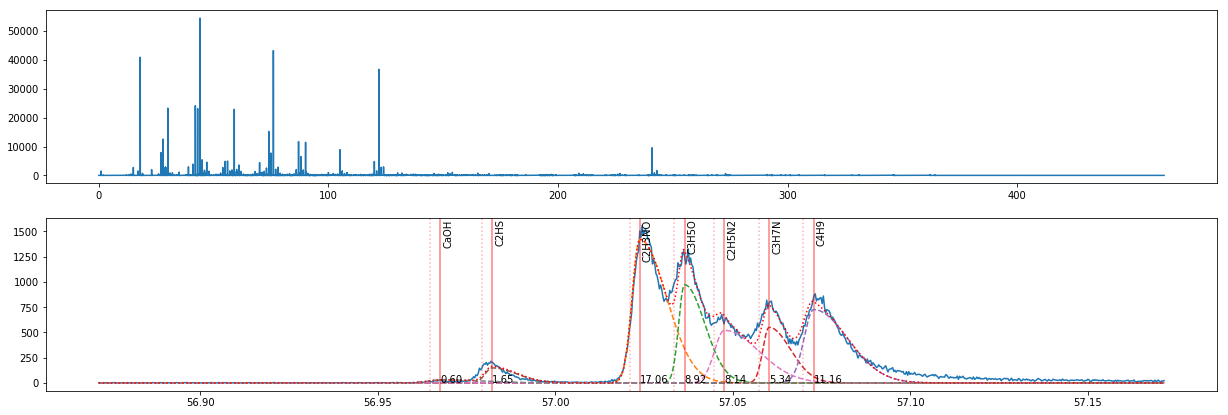

In [66]:
Path = DB_PATH = os.path.join(os.path.abspath(os.path.join(pySPM.__file__, "..")), "data", "Cysteine_B3p_p_01_0.ita")
A = pySPM.ITA(Path)

m, S = A.getSpectrum()

fig, ax = plt.subplots(2,1,figsize=(21,7))

ax[0].plot(m, S);
pySPM.utils.showPeak(m, S, pySPM.utils.get_mass('C2H3NO'), ax=ax[1], dofit=True);

## Saving / Loading of  Data / Variables
Python objects can be saved and retrieved with this utility. Data are also compressed with DEFLATE (zip) so that it saves space on disk. It can be usefull to save reconstruction of data (which is time intensive).

7


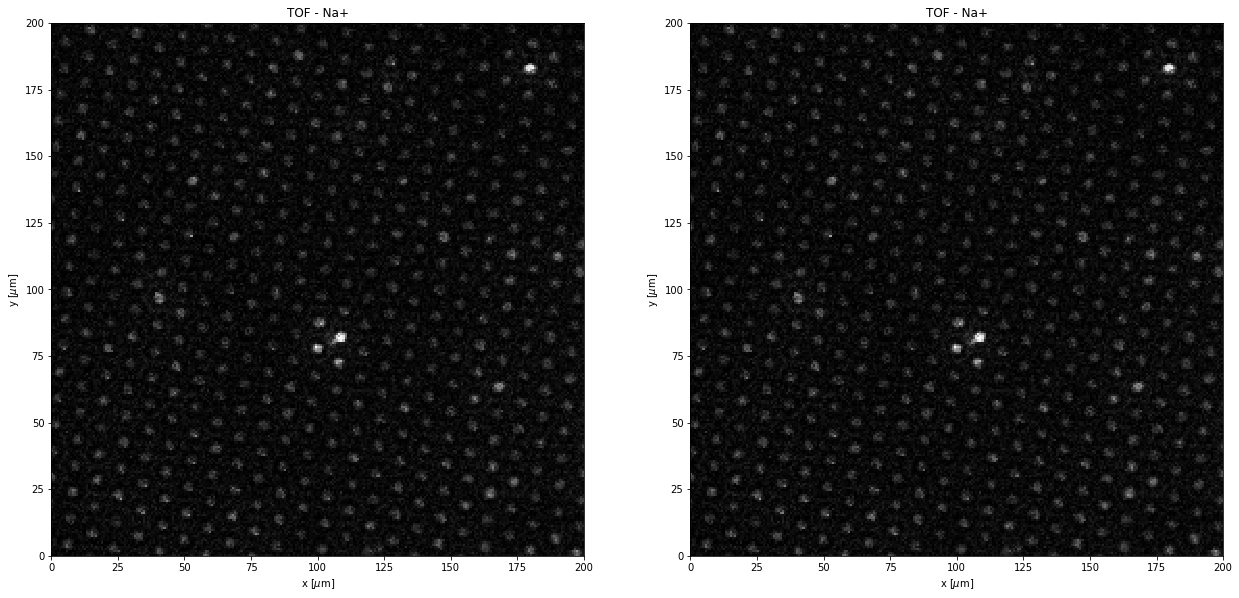

In [46]:
filename = os.path.join(os.path.abspath(os.path.join(pySPM.__file__,"..")),"data","AuTi_Img_Bi1_p_A2_7_0.ita")
TOF = pySPM.ITA(filename)
Na,_ = TOF.getAddedImageByName('Na')

pySPM.utils.save('PySPM-DOC',A=12.123)
pySPM.utils.save('PySPM-DOC',B=7,Na=Na)

ax = pySPM.utils.sp(2)
Na.show(ax=ax[0]);

Na2 = pySPM.utils.load('PySPM-DOC','Na')
Na2.show(ax=ax[1]);
print(pySPM.utils.load('PySPM-DOC','B'))

## various
### ASCII-art


In [62]:
pySPM.utils.show_table(np.random.rand(100).reshape((10,10)))

In [61]:
Table = np.round(np.random.rand(100).reshape((10,10)),3).tolist()
pySPM.utils.aa_table(Table)

0.368....  0.694....  0.826....  0.971....  0.088....  0.88.....  0.167....  0.599....  0.063....  0.106....
0.207____  0.72_____  0.609____  0.933____  0.756____  0.216____  0.585____  0.691____  0.284____  0.297____
0.896....  0.629....  0.61.....  0.326....  0.031....  0.504....  0.159....  0.859....  0.317....  0.219....
0.498____  0.315____  0.236____  0.992____  0.247____  0.112____  0.823____  0.052____  0.737____  0.425____
0.076....  0.802....  0.882....  0.953....  0.809....  0.868....  0.025....  0.383....  0.579....  0.687....
0.784____  0.98_____  0.494____  0.444____  0.757____  0.055____  0.961____  0.299____  0.791____  0.706____
0.278....  0.547....  0.093....  0.632....  0.428....  0.89.....  0.299....  0.801....  0.863....  0.126....
0.43_____  0.2______  0.692____  0.099____  0.965____  0.328____  0.425____  0.556____  0.023____  0.559____
0.861....  0.186....  0.614....  0.214....  0.932....  0.968....  0.568....  0.703....  0.12.....  0.022....
0.993____  0.726___